In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv("/content/df.csv")


In [ ]:
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [ ]:
df.tail()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0
9549,Vizaq,Weather,Sunny/Clear,Total Injured,813.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
import pandas as pd

df = pd.read_csv('/content/df.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
df.shape

(9550, 5)

In [ ]:
df.dtypes

,0
Million Plus Cities,object
Cause category,object
Cause Subcategory,object
Outcome of Incident,object
Count,float64


In [ ]:
df.dtypes.value_counts()

,count
object,4
float64,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Million Plus Cities,0
Cause category,0
Cause Subcategory,0
Outcome of Incident,0
Count,3


/tmp/ipython-input-3284839160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_data.values, y=cause_data.index, palette='viridis')


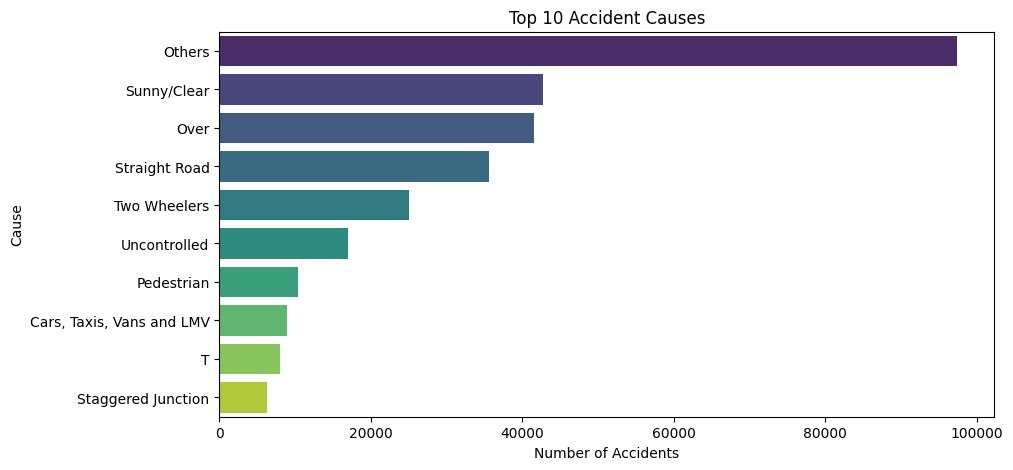

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.dropna(subset=['Count'], inplace=True)

df_total = df[df['Outcome of Incident'] == 'Total number of Accidents']
cause_data = df_total.groupby('Cause Subcategory')['Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=cause_data.values, y=cause_data.index, palette='viridis')
plt.title("Top 10 Accident Causes")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause")
plt.show()

/tmp/ipython-input-3897933399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_data.values, y=outcome_data.index, palette='coolwarm')


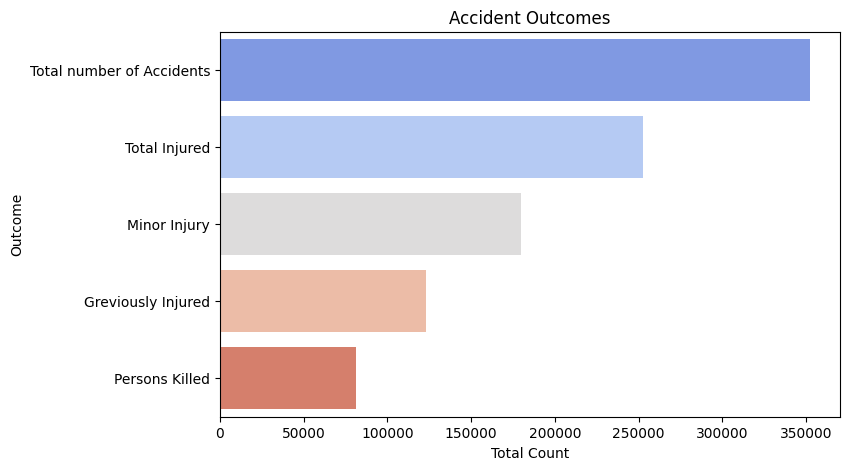

In [ ]:
outcome_data = df.groupby('Outcome of Incident')['Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=outcome_data.values, y=outcome_data.index, palette='coolwarm')
plt.title("Accident Outcomes")
plt.xlabel("Total Count")
plt.ylabel("Outcome")
plt.show()


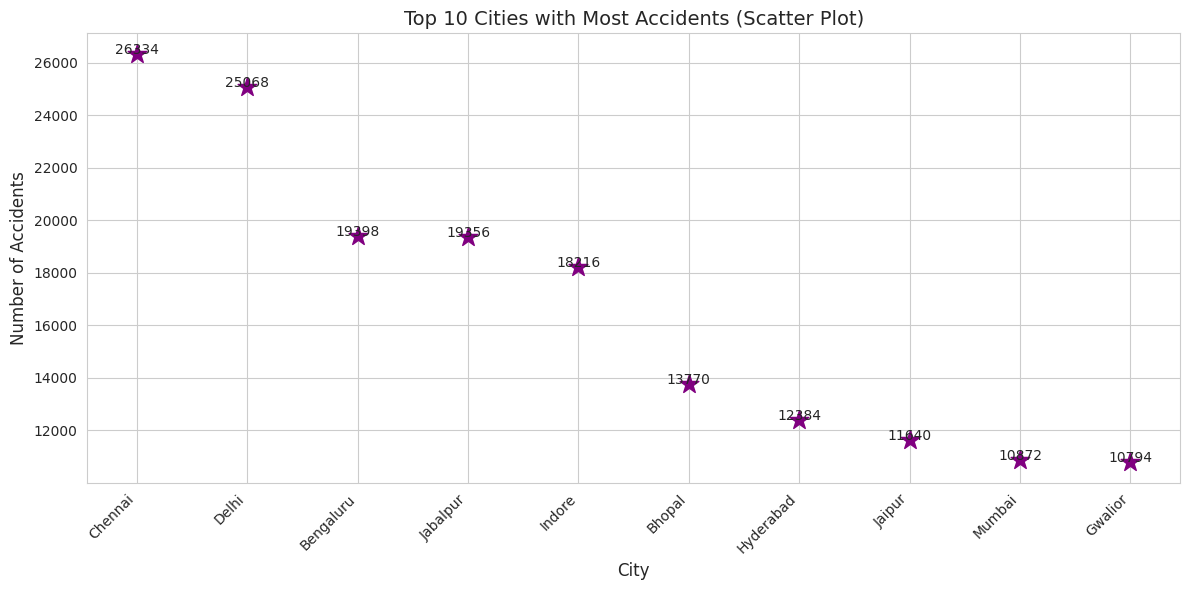

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

city_data = df_total.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6)) # Increase figure size
sns.set_style("whitegrid") # Apply a seaborn style
plt.scatter(city_data.index, city_data.values, color='purple', s=200, marker='*') # Change color, size, and marker

for i, value in enumerate(city_data.values):
    plt.text(city_data.index[i], value + 5, str(int(value)), ha='center')

plt.title("Top 10 Cities with Most Accidents (Scatter Plot)", fontsize=14) # Increase title font size
plt.xlabel("City", fontsize=12) # Increase xlabel font size
plt.ylabel("Number of Accidents", fontsize=12) # Increase ylabel font size
plt.xticks(rotation=45, ha='right') # Adjust rotation and alignment
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1715368618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_category_data.values, y=cause_category_data.index, palette='viridis')


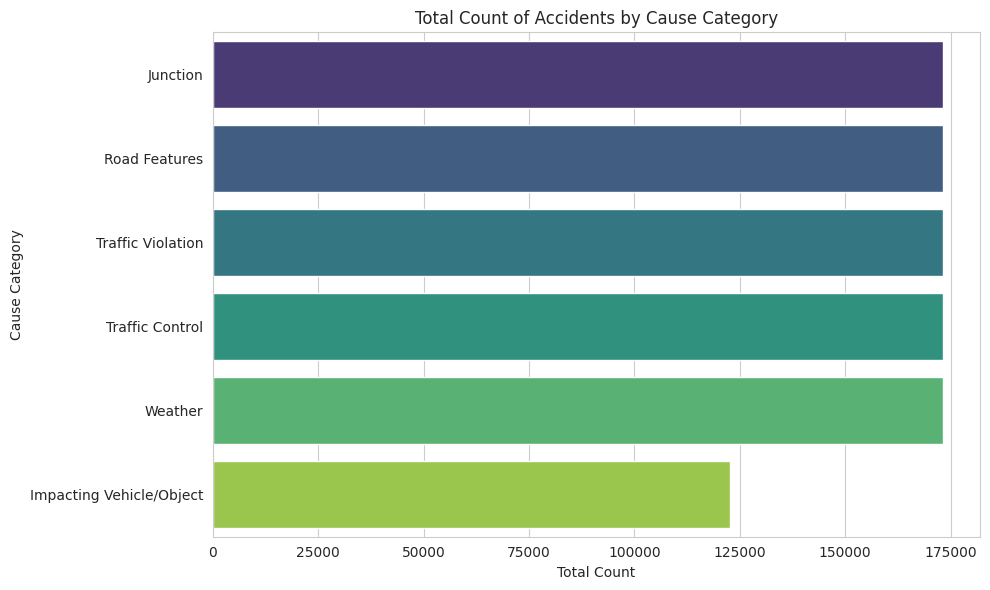

In [ ]:

cause_category_data = df.groupby('Cause category')['Count'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=cause_category_data.values, y=cause_category_data.index, palette='viridis')
plt.title('Total Count of Accidents by Cause Category')
plt.xlabel('Total Count')
plt.ylabel('Cause Category')
plt.tight_layout()
plt.show()